Must Know First!! <br>
### Description
- Objective
Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python. <br>

You are expected to do the following :<br>

- Come up with a customer profile (characteristics of a customer) of the different products
- Perform univariate and multivariate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers.
 

### Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

- Product - The model no. of the treadmill
- Age -  Age of the customer in no of years
- Gender - Gender of the customer
- Education - Education of the customer in no. of years
- Marital Status - Marital status of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - Income of the customer
- Miles- Miles that a customer expects to run
 

### Best Practices for Notebook
The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
The notebook should be submitted as an HTML file (.html) and NOT as a notebook file (.ipynb).<br>
**Note:**

Please note the visualizations done in 'Plotly' will lose interactiveness after the notebook is converted to '.html' format. So, it is not mandatory to use Plotly and no marks will be deducted for the same. 
<br>

Submission Guidelines<br>
The submission should be a well-commented notebook [format - .html]<br>
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks.<br>
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation.<br>
Submission will not be evaluated if<br>
it is submitted post-deadline, or,<br>
more than 1 file is submitted.<br>
<br>
<br>
Happy Learning!

Scoring guide (Rubric) - Cardio Good Fitness
Criteria	Points
- **Understanding the structure of the data**
Overview of the dataset shape, datatypes - Statistical summary and check for missing values
2
- **Univariate Data Analysis**
Analysis of spread and distribution of every feature in the dataset.
8
- **Multivariate Data Analysis**
Analysis of interaction between features, in the dataset
10
- **Quality & Use of visualisations**
The details in Visualization used.
6
- **Conclusion and Recommendations**
Conclude with the key insights/observations
10
- **Well commented Python Code**
Structure and flow - Well commented code
4
Points	40
Submit Assignment


1. Step import all necessary libraries for statistical analysis, and visualization

In [3]:
# Reading files and numerical manipulation libraries.
import pandas as pd
import numpy as np

# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppress the warning associated with matplotlib library.
import warnings
warnings.filterwarnings("ignore")

2. Read the data (from csv file) as dataframe by using read_csv from pandas library

In [4]:
# Define the file path
filename = 'CardioGoodFitness.csv'
# Read the csv file as a DataFrame
df = pd.read_csv(filename)

3. Understand structure of the data.

In [5]:
# Preview the first 5 rows of the loaded file.
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
# Preview the last 5 rows of the loaded file.
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [7]:
# Print all columns of the data and counts the number of columns available
print(df.columns)
print("="*75)
print("Number of columns in the dataframe: " + str(len(df.columns)))
print("="*75)


Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')
Number of columns in the dataframe: 9


In [8]:
# View each column's information to understand what does each column contains (Data types) as well as number of rows each column contains.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Observations
- As it can be seen
There are 3 Categorical variables (including product, Gender and MaritalStatus) and 6 numerical variables.
- It would be better if we can convert the Fitness column to categorical.
- There are 180 instances.
- There are 9 columns.


In [9]:
df.Product = df.Product.astype('category')
df.Gender = df.Gender.astype('category')
df.MaritalStatus = df.MaritalStatus.astype('category')
df.Fitness = df.Fitness.astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


Step 4. Statistical Analysis

In [11]:
df.describe(include=['category'])

,Product,Gender,MaritalStatus,Fitness
count,180,180,180,180
unique,3,2,2,5
top,TM195,Male,Partnered,3
freq,80,104,107,97


Note: freq means frequency of the variable in the dataset.

In [12]:
numeric_columns = ['Age', 'Education', 'Usage', 'Income', 'Miles']
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


Analysis
1. There some age values that are greater than 33 which is the Q3 of the data.
2. Income variable may need further exploration, as it can be seen the standard deviation is far to big compared to the mean value.

Step 5. Univariate Data Analysis

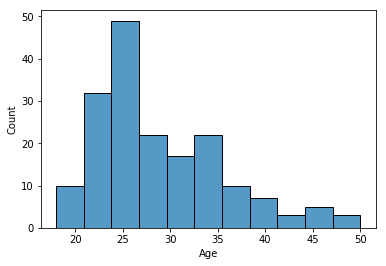

In [ ]:
sns.histplot(data=df, x='Age');

It is clear from the above plot of 'Age', that data distribution is slightly right-skewed, which means, the average number of participants are ranges between 0 - 38. <br>
But what about the values that are lying right to the distribution? To know more about these values, we need to create a boxplot.


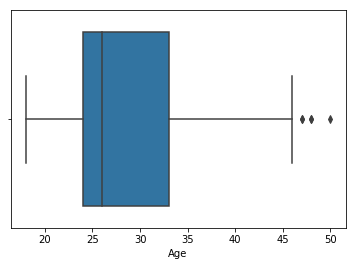

In [ ]:
sns.boxplot(data=df, x="Age");

Observations: 
- *The Age columns have a fewer number of outlier that is age greater that $2*IQR$*.
- *The graph is right-skewed since the median and the tail is dragged to the right.*
- *About 50% of all customers are of Age between 24 and 26.*

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

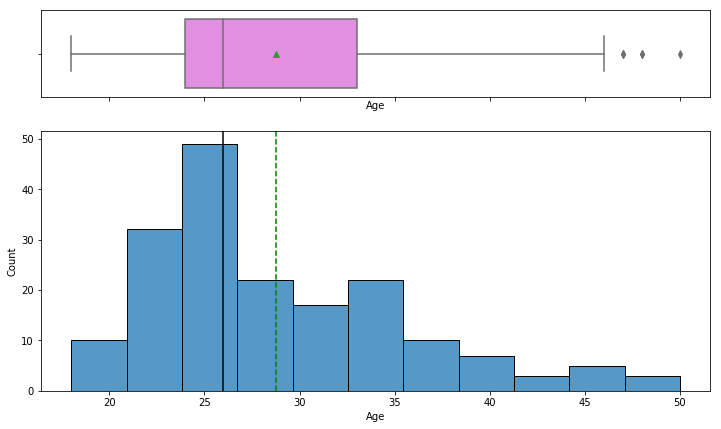

In [ ]:
histogram_boxplot(df, 'Age')

Most customers are within the age range between 18 and 33, while 50% are within the age range between 24 - 26.


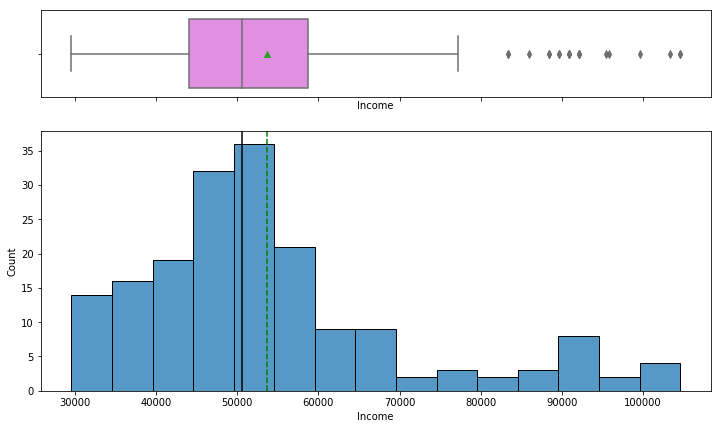

In [ ]:
histogram_boxplot(df, 'Income')

75% of the customers have Income less that 60,000 and some outliers(customers with Income higher than 80,000).

## Observing the distribution of customers' education.

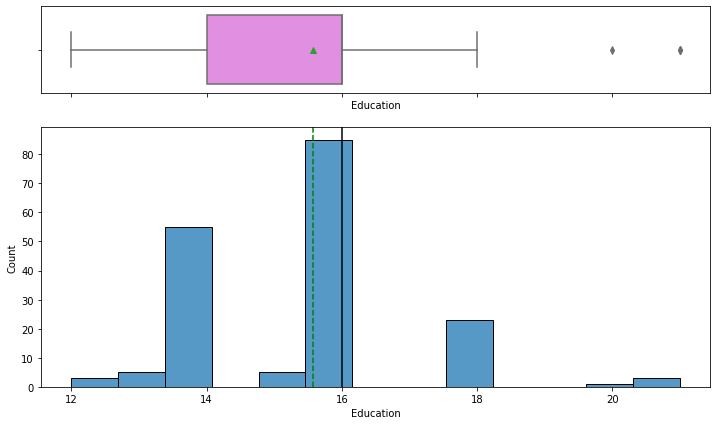

In [ ]:
histogram_boxplot(df, 'Education');

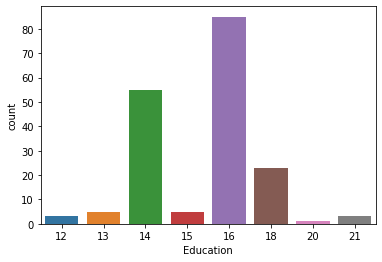

In [ ]:
sns.countplot(data=df, x='Education');

### Observations
- *Observing the distribution of the customers' education, the minimum number of years is 12 and maximum is 21.*
- *As it can be seen, the high number of customers are those who have 16 years of education, followed by 14 and then 18.*

### Observing the distribution of usage.

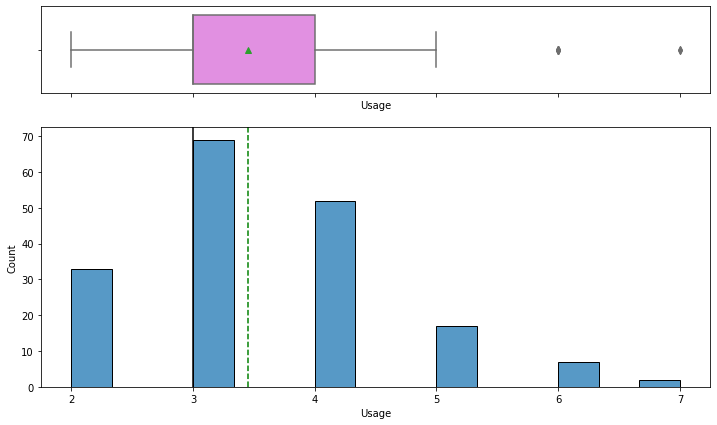

In [ ]:
histogram_boxplot(df, 'Usage')

### Observing the distribution of Miles.

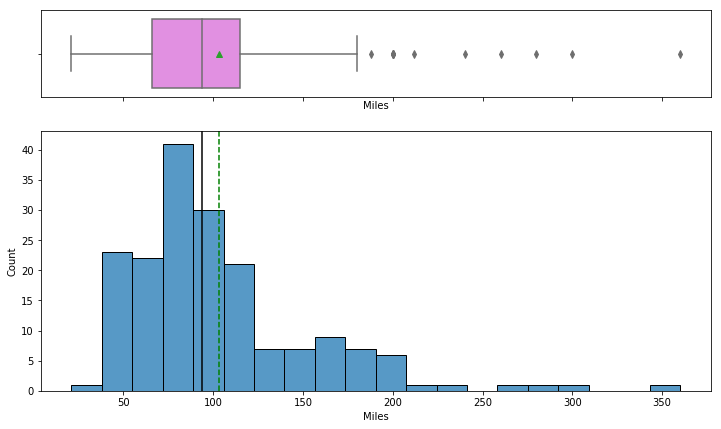

In [ ]:
histogram_boxplot(df, 'Miles')

# Exploring Categorical Variables.

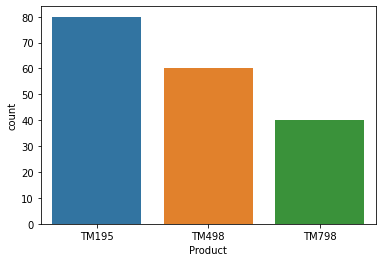

In [ ]:
sns.countplot(data=df, x='Product');

- *As it can be observed, there are three groups of products to be consumed and TM195 as more preferable product than the other products.*

### Gender distribution

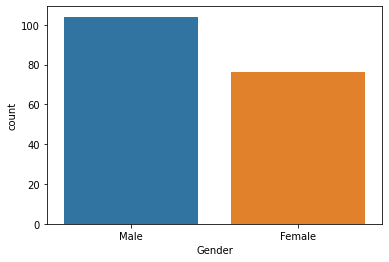

In [ ]:
sns.countplot(data=df, x='Gender');

- *There are slightly different between the number of Male customers and the number of Female customers.*
- *However, there are more Male customers than Female customers.*

### Marital Status distribution

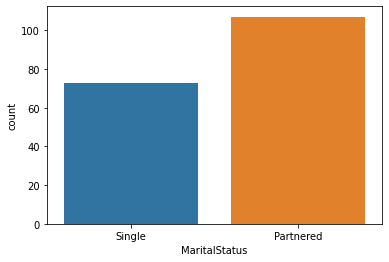

In [ ]:
sns.countplot(data=df, x='MaritalStatus');

### Observations
- *There are slightly different between the number of  customers who are Single and Partnered.*
- *However, there are less Single customers than Partnered customers.*

### Analyzing 'Fitness' column distribution

It makes more sense to treat the Fitness column as categorical variable since each value is a rating ruther than the quantity.

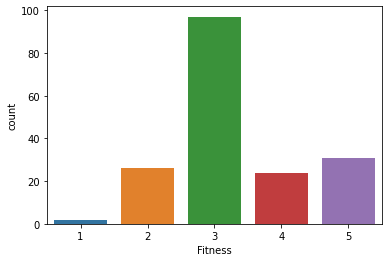

In [30]:
sns.countplot(data=df, x='Fitness');

### Observations
- *Few number of customers rate themselves as unfit (Fitness value of 1), while more customers rate themselves average fit (Finess value of 3).*

### **Bivariate Analysis**

Compute the correlation among the numerical columns of the dataset.

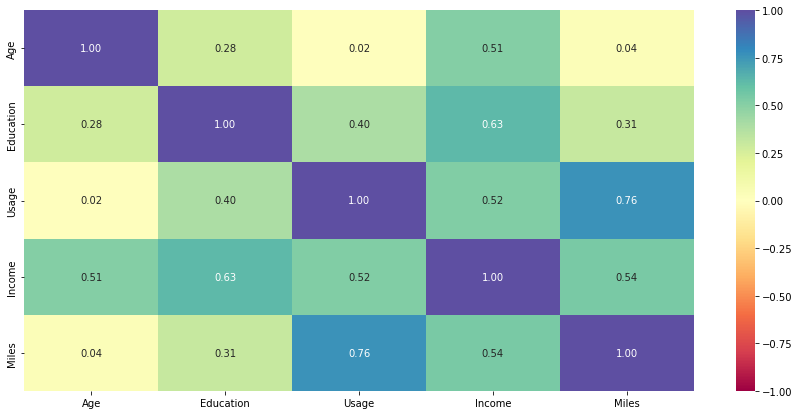

In [39]:
corr = df[numeric_columns].corr()

# Plot the heatmap with defined figure and color.
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations
- *There are are two variables that highly correlated, that are Usage and Miles followed by Income and Education which is obvious because it is expected that the more the customer use the tredmils the more likely to cover more miles*
- *Age and usage are two variables that are less correlated*

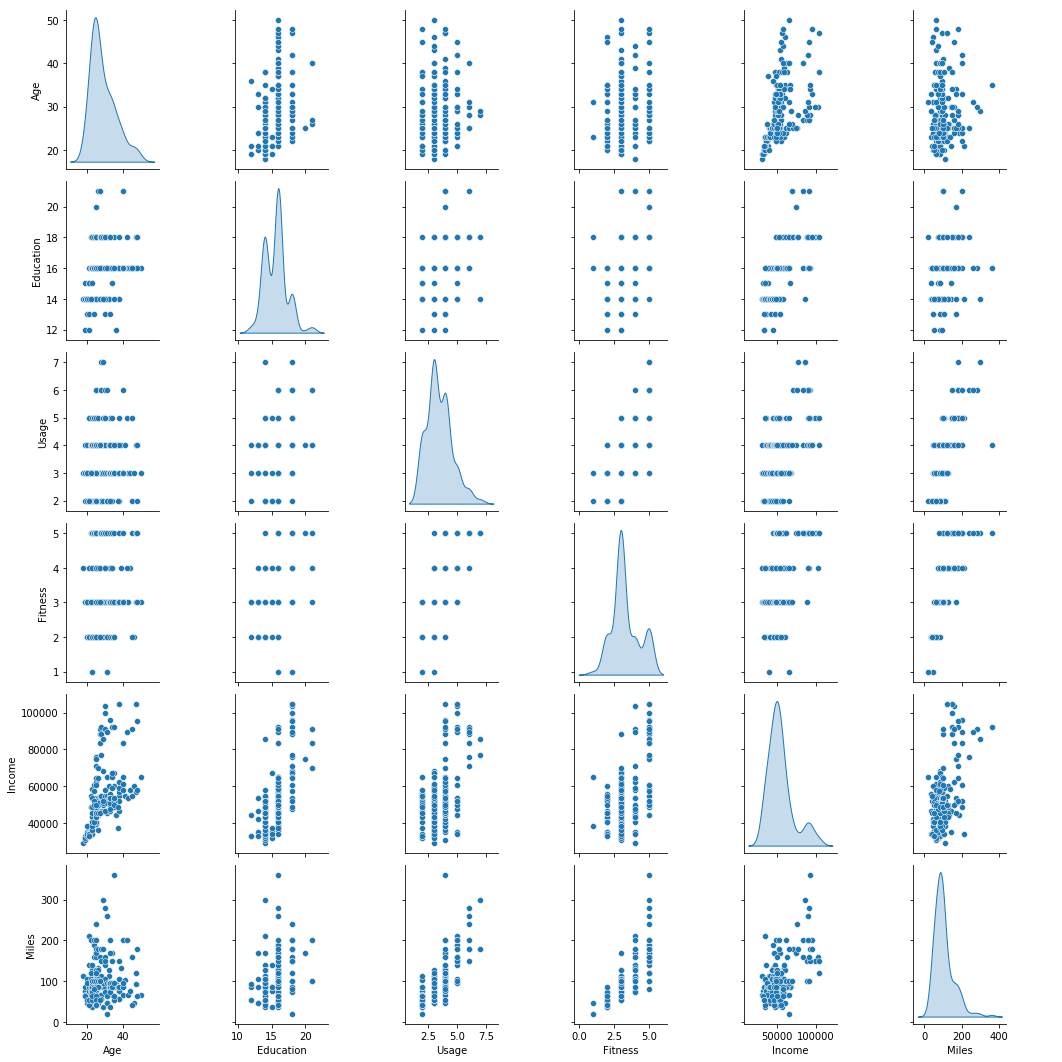

In [ ]:
# Plotting pairplot
sns.pairplot(df, diag_kind="kde");

### Observations
- *There are some variables (Age and Income, Income and Mile) that show some kind of relationship but not clearly as linear.*
- *Other variables relationships cannot easily defined.*

### Age vs Income analysis

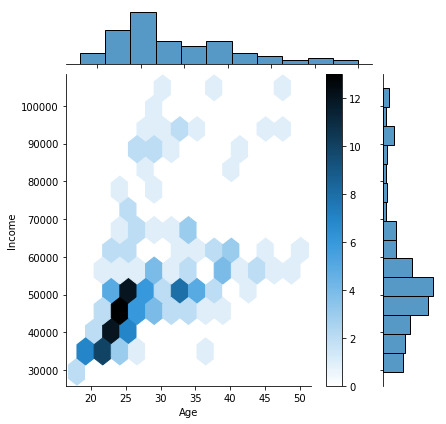

In [ ]:
sns.jointplot(data=df, x='Age', y='Income', kind="hex");
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

Observations
- *A large number of customers will be of Age less than 42 and their Income is less that 70,000*

### Income and Miles analysis

Note: Observations after the next two plots.

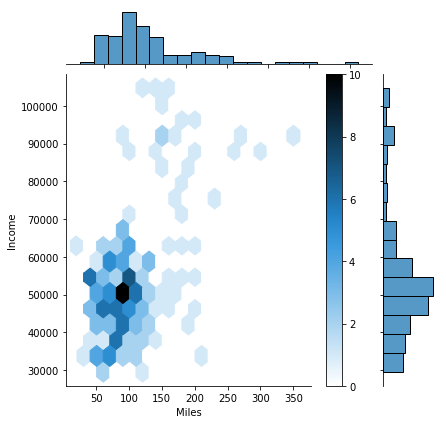

In [ ]:
sns.jointplot(data=df, x='Miles', y='Income', kind="hex");
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

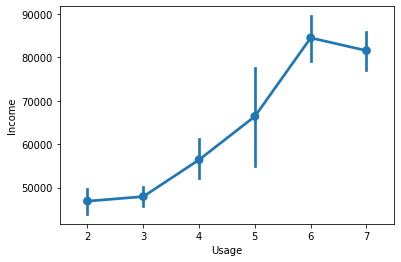

In [38]:
sns.pointplot(data=df, x=df.Usage, y='Income');

### Observations
- *There is obvious trend whereby customers with high income tend to invest more time*
- *A lot of Customers with the income up to 70k can use the product mostly up to 4 times in a week and cover less than 250 miles.*

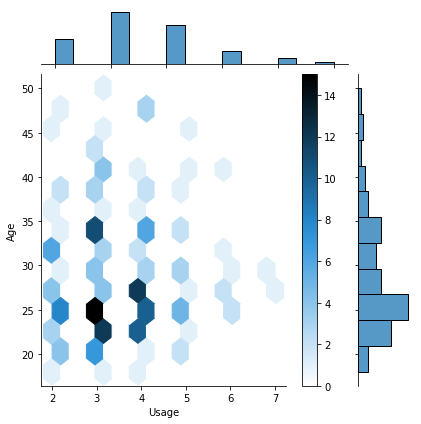

In [ ]:
sns.jointplot(data=df, x='Usage', y='Age', kind="hex");
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

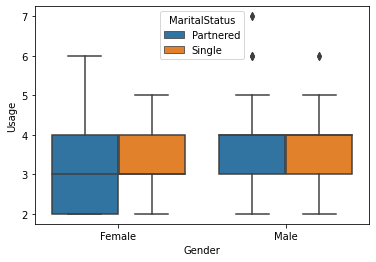

In [29]:
sns.boxplot(df.Gender, df.Usage, hue=df.MaritalStatus);

### Observations
- *More than 75% of the Partnered Females can only use the machine up 4 times in a week, however they can there are some females that can use the machine up to max of 6 times.*
- *Males disribution is the same for both, single and partnered, however there some outliers males who can use the machine up to 7 times*

### Fitness vs Income analysis

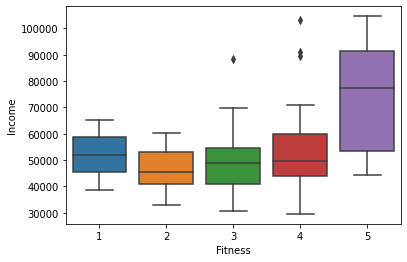

In [41]:
sns.boxplot(df.Fitness, df.Income);

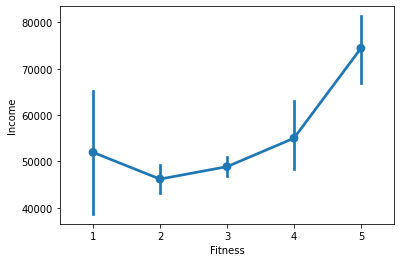

In [43]:
sns.pointplot(df.Fitness, df.Income);

### Observations from the tow plots above:
- *Higher income customers are Fitter and lesser income customers*
- *There is Positive between the two variables (Income and Fitness) *

### Gender vs Income vs Marital Status

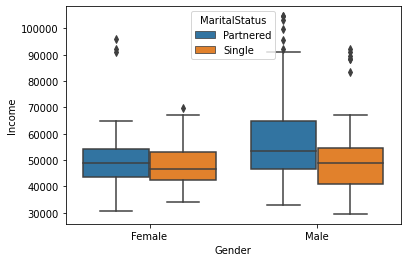

In [17]:
sns.boxplot(df.Gender, df.Income, hue=df.MaritalStatus);

### Observations
- *Female Income are comperable but with a few outliers for Partnered whose Income are way too high.*
- *Most of males have high income with great number of outliers who have very high Income.*

### Gender vs Age vs Marital Status

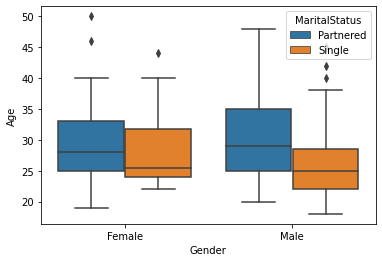

In [18]:
sns.boxplot(df.Gender, df.Age, hue=df.MaritalStatus);

### Observations
- *For both Males and Females partnered, older customers are likely to use product more.*
- *There are some exceptional old Partnered that use the Product*

### Product Vs Income

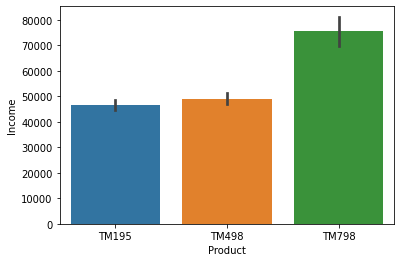

In [27]:
sns.barplot(data=df, x=df.Product, y=df.Income );

### Observations
- *The mean (Average Income) for the first two products (TM195 and TM498) is quite similar; therefore, just one product can be used instead of both.*
- *High Income customers prefer TM798 than the other two products (TM195 and TM498)*

### Product vs Miles

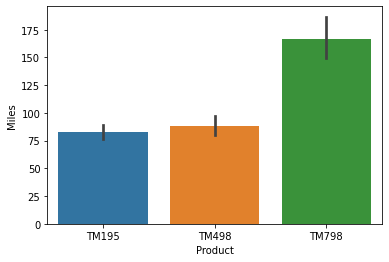

In [36]:
sns.barplot(data=df, x=df.Product, y=df.Miles );

<AxesSubplot:xlabel='Product', ylabel='Miles'>

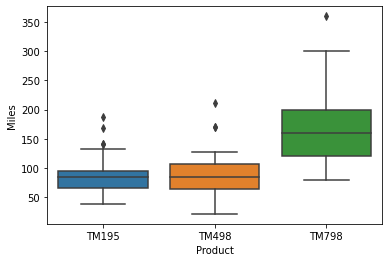

In [31]:
sns.boxplot(df.Product, df.Miles);

### Observations for two plots above
- *The average Miles range of product TM798 is too high that is within the outliers of the Miles range of product TM195 and TM498.*
- *The average Miles range of product TM195 and TM195 are similar with a few outliers.*

### Overall observations
More focused on Products and Customers

### Products available: TM195, TM498 AND TM798

### TM195
1. Preferred by low income people and mostly purchased.
2. Preferred by people that less than 41 years old.
3. Lesser average Miles
4. Preferred by Partnered customers.
5. Preferred by customers that can use it for about 2 to 4 times in a week.
6. No significant difference in sales by Gender.
7. Average fitness customers.

### TM498
1. More similar to TM195.

### TM798
1. Preferred by very fit and high income people however, least purchased.
2. Preferred by people that less than 41 years old.
3. Higher average Miles.
4. Preferred by Partnered customers.
5. Preferred by Males.
6. Usage between 4 to 7 times in a week.


### Conclusions and recommendations
1. There are no missing values in the dataset.
2. Detailed descriptions for Usage, Miles, MaritalStatus and Income columns are needed.
3. More customers of Age between 24 and 26 are likely (around 50%) to use products more than others.
4. Customers with average and Extremely fit people are likely to use the machine more.
5. The product TM798 might be expensive since customers with high income are likely to use the them.
6. Market department should target people that are younger for product TM195 and TM498.
7. Frequently promotions are likely to increase the sales.
8. Instead of selling products (TM195 and TM498), the Cardion should consider renting the products or open the fitness center to target low income customers.
9. Extra effort should be given to keeping customers with high income through recommendations of other health and fitness activities.
